In [1]:
# Imports
import pandas as pd
import numpy as np 
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
# Read in data from github repo, you should also have this locally saved ...
data = pd.read_csv("https://raw.githubusercontent.com/UVADS/DS-3001/main/data/LogReg.csv")

#lets take a look
print(data.head())
data.info()

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


<AxesSubplot:xlabel='index', ylabel='admit'>

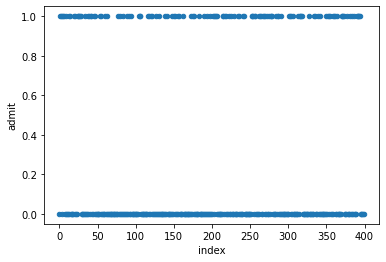

In [3]:
data.reset_index().plot.scatter(x = 'index', y = 'admit') #creates new column as index

In [4]:
#data.admit = data.admit.astype('object') #dont want this
data['rank'] = data['rank'].astype('category') #change the column rank to be categorical

In [5]:
data.info() #looks good, rank is cateogrical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   admit   400 non-null    int64   
 1   gre     400 non-null    int64   
 2   gpa     400 non-null    float64 
 3   rank    400 non-null    category
dtypes: category(1), float64(1), int64(2)
memory usage: 10.1 KB


In [6]:
#Create a general linear model, by defualt the family classification used gives us it in log terms
admitlogit = sm.formula.glm("admit ~ rank+gpa+gre", family=sm.families.Binomial(), data=data).fit()

In [7]:
#Let's take a look
admitlogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                            GLM   Df Residuals:                      394
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -229.26
Date:                Mon, 11 Jul 2022   Deviance:                       458.52
Time:                        11:09:04   Pearson chi2:                     397.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09846
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
rank[T.2]     -0.6754      0.316     -2.134      0.033      -1.296      -0.055
rank[T.3]     -1.3402      0.345     -3.881      0.000      -2.017      -0.663
rank[T.4]     -1.5515      0.418     -3.713      0.000      -2.370      -0.733
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
gre            0.0023      0.001      2.070      0.038       0.000       0.004
==============================================================================
"""

In [8]:
#Because the output is in log terms we need to convert to % using exp
#easier way???
ok = [{'Intercept': admitlogit.params.Intercept, 'gre': admitlogit.params.gre, 'gpa': admitlogit.params.gpa,'rank2':admitlogit.params['rank[T.2]'],
'rank3':admitlogit.params['rank[T.3]'], 'rank4':admitlogit.params['rank[T.4]']}]
coefs = pd.DataFrame(ok)
np.exp(coefs) #Because the output is in log terms we need to convert to % using exp

,Intercept,gre,gpa,rank2,rank3,rank4
0,0.0185,1.002267,2.234545,0.508931,0.261792,0.211938


In [9]:
##Test our models goodness of fit 
### How to do hl test???

In [10]:
#We can also use a ROC curve gauge how well we are classifying the data in combination with the predict function

#First we want to use the data to predict the likelihood that each student will be admitted, similar to residual deviance  
prop= admitlogit.fittedvalues
prop

0      0.172627
1      0.292175
2      0.738408
3      0.178385
4      0.118354
         ...   
395    0.488670
396    0.165504
397    0.181062
398    0.463667
399    0.300731
Length: 400, dtype: float64

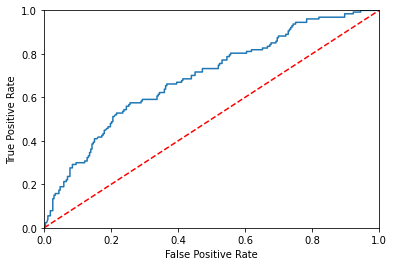

In [11]:
fpr, tpr, _ = metrics.roc_curve(data.admit,  prop)

#create ROC curve 
plot= plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() #is not inverted x-axis, not specificity instead its fpr

# Try on mtcars, developed ROC, convert the coef to %

In [12]:
from pydataset import data
mtcars = data('mtcars')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [14]:
carsmodel = sm.formula.glm("vs~wt+disp", family=sm.families.Binomial(), data = mtcars).fit()
carsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     vs   No. Observations:                   32
Model:                            GLM   Df Residuals:                       29
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.700
Date:                Mon, 11 Jul 2022   Deviance:                       21.400
Time:                        11:09:16   Pearson chi2:                     21.8
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5043
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6086      2.439      0.660      0.510      -3.172       6.389
wt             1.6264      1.491      1.091      0.275      -1.295       4.548
disp          -0.0344      0.015     -2.241      0.025      -0.065      -0.004
==============================================================================
"""

In [15]:
###hl model

In [16]:
okmt = [{'Intercept': carsmodel.params.Intercept, 'wt': carsmodel.params.wt, 'disp': carsmodel.params.disp}]
coefsmt = pd.DataFrame(okmt)
np.exp(coefsmt) #Because the output is in log terms we need to convert to % using exp

,Intercept,wt,disp
0,4.995775,5.085296,0.966152


Text(0.5, 0, 'False Positive Rate')

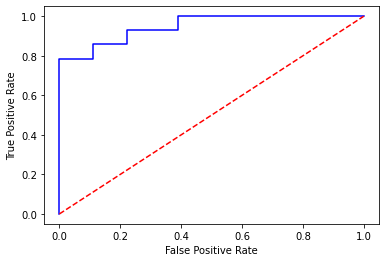

In [17]:
propmt= carsmodel.fittedvalues
propmt

fpr1, tpr1, _ = metrics.roc_curve(mtcars.vs,  propmt)
plt.plot(fpr1, tpr1, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Below is a example of how we can split the dataset into test and train

In [18]:
#Data set we will be working with is...default 
#upload data as well in pr

default = pd.read_excel (r'/Users/bpugs/Desktop/Default.xlsx') #place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'
default.head()

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [19]:
#get rid of unnamed column
default = default.drop('Unnamed: 0', axis =1)

In [20]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [21]:
default.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [22]:
default.default = default.default.map({'Yes': 1, 'No': 0})

In [23]:
default.default.value_counts()

0    9667
1     333
Name: default, dtype: int64

In [24]:
#So let's try to predict who will default by using a more common machine learning process of splitting the data into train and test segmenets. We are going to to go with a 80 train 20% test appoarch. Not that the common and space tells R to include the entire data.frame
train = default.iloc[:8000,:]
test = default.iloc[8000:10000,:]


In [25]:
#Next we will run our logisitc regression model ---WRONG SIGN???----

default_model = sm.formula.glm("default~balance+income+student",family=sm.families.Binomial(),data = train).fit()

default_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7996
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -617.85
Date:                Mon, 11 Jul 2022   Deviance:                       1235.7
Time:                        11:09:36   Pearson chi2:                 4.92e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1283
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -11.1808      0.564    -19.837      0.000     -12.285     -10.076
student[T.Yes]    -0.6034      0.271     -2.223      0.026      -1.135      -0.071
balance            0.0059      0.000     22.029      0.000       0.005       0.006
income          5.614e-06   9.38e-06      0.599      0.549   -1.28e-05     2.4e-05
==================================================================================
"""

In [26]:
#We drop income
default_model2 = sm.formula.glm("default~balance+student",family=sm.families.Binomial(),data = train).fit()
default_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -618.03
Date:                Mon, 11 Jul 2022   Deviance:                       1236.1
Time:                        11:09:38   Pearson chi2:                 4.91e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1282
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.9615      0.424    -25.841      0.000     -11.793     -10.130
student[T.Yes]    -0.7314      0.166     -4.396      0.000      -1.057      -0.405
balance            0.0059      0.000     22.051      0.000       0.005       0.006
==================================================================================
"""

In [27]:
#Just out of curiousty
default_model3 = sm.formula.glm("default~income+student",family=sm.families.Binomial(),data = train).fit()
default_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1159.0
Date:                Mon, 11 Jul 2022   Deviance:                       2318.0
Time:                        11:09:39   Pearson chi2:                 8.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):           0.001974
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.9564      0.321    -12.325      0.000      -4.586      -3.327
student[T.Yes]     0.7198      0.216      3.337      0.001       0.297       1.143
income          1.036e-05   7.58e-06      1.367      0.172   -4.49e-06    2.52e-05
==================================================================================
"""

In [28]:


okdef = [{'Intercept': default_model2.params.Intercept, 'student': default_model2.params["student[T.Yes]"],'balance': default_model2.params.balance}]
coefsmtdef = pd.DataFrame(okdef)
np.exp(coefsmtdef) #Because the output is in log terms we need to convert to % using exp

,Intercept,student,balance
0,0.000017,0.481235,1.005904


# We can also evaluate our varaible choices using the ANOVA function and the likelihood ratio test to see if significant changes have occured.  

In [29]:
default_model.summary()
llf = default_model2.llf
llfincome = default_model.llf

In [30]:
from scipy.stats.distributions import chi2
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

LR = likelihood_ratio(llf,llfincome)
p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1

print ('p: %.30f' % p , LR)

#lr is equivalent to the Pr(>chi)

p: 0.549342625669001494159715548449 0.35849614660605766


# Moving on, we want to do some predicting and evaluate our model further

In [31]:
pred_model2= default_model2.predict(test)
pred_model2

8000    0.000104
8001    0.000139
8002    0.029616
8003    0.000087
8004    0.000619
          ...   
9995    0.001143
9996    0.001501
9997    0.002509
9998    0.151110
9999    0.000027
Length: 2000, dtype: float64

In [32]:
pred_model2_1 = pd.cut(pred_model2, bins = [-1,.5,1], labels =[0,1])

In [33]:
#essentially we are creating percentage likelihood of default for each value, above 50% we are saying it's more likely to occur.
pred_model2_1.value_counts()

0    1966
1      34
dtype: int64

In [34]:
pred_model2_1.astype('int64')

8000    0
8001    0
8002    0
8003    0
8004    0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 2000, dtype: int64

In [35]:
#this is the number that we missed
x = sum(pred_model2_1!=test.default)
x

53

In [36]:
#percent that we hit..... Good job!
((2000-x)/2000)*100

97.35000000000001

# For our next trick let's do a roc curve, just to confirm our model, using a different package then our first example

In [267]:
newpred = default_model2.predict(test)
newpred

8000    0.000104
8001    0.000139
8002    0.029616
8003    0.000087
8004    0.000619
          ...   
9995    0.001143
9996    0.001501
9997    0.002509
9998    0.151110
9999    0.000027
Length: 2000, dtype: float64

Text(0.5, 0, 'False Positive Rate')

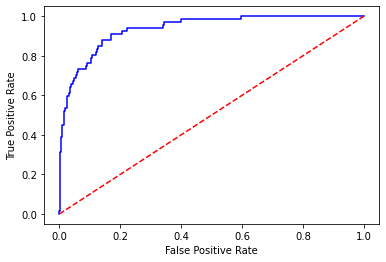

In [273]:
fpr2, tpr2, _ = metrics.roc_curve(test.default,  newpred)
plt.plot(fpr2, tpr2, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [276]:
# calculate AUC
auc = metrics.roc_auc_score(test.default,  newpred)
auc

0.9364455528873995

# Finally we want to actually predict something right?!

In [283]:
xx = pd.DataFrame([{"student": "Yes", "balance":5000}])
xx

,student,balance
0,Yes,5000


In [285]:
xxpred = default_model2.predict(xx)
xxpred #Pretty high chance according to the data we have, what if we cut the balance to 2000?

0    1.0
dtype: float64

In [288]:
xx_11 = pd.DataFrame([{"student": "Yes", "balance":2000}])
xxpred_1 = default_model2.predict(xx_11)
xxpred_1 #Likelihood drops to 52%

0    0.519886
dtype: float64

In [320]:
new_data_test = pd.DataFrame(index=range(10000),columns=['student','balance'])
new_data_test['student'] = 'Yes'
new_data_test['balance'] = list(range(1,10001))

new_data_test_pred = pd.DataFrame(default_model2.predict(new_data_test))
new_data_test_pred.head(5)

,0
0,0.000008
1,0.000008
2,0.000009
3,0.000009
4,0.000009


<AxesSubplot:xlabel='Credit Card Debt', ylabel='Likelihood of Default'>

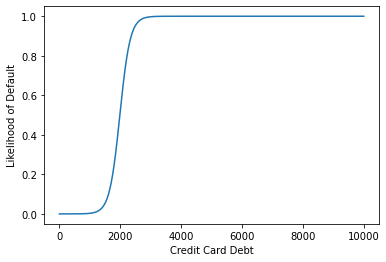

In [333]:
new_data_test_pred.plot(xlabel="Credit Card Debt", ylabel="Likelihood of Default", legend=False)